In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#### file = 'data/run_1/landaudamp1.vp_energy'
run_id = 4

file_energy = './landaudamp{}/landaudamp{}.vp_energy'.format(run_id,run_id)

file_f1 = './landaudamp{}/landaudamp{}.phase_space.1' .format(run_id,run_id)
file_f2 = './landaudamp{}/landaudamp{}.phase_space.2'.format(run_id,run_id)
file_f3 = './landaudamp{}/landaudamp{}.phase_space.3'.format(run_id,run_id)
file_f4 = './landaudamp{}/landaudamp{}.phase_space.4'.format(run_id,run_id)
file_phi = './landaudamp{}/landaudamp{}.vp_phi'.format(run_id,run_id)





nt:11
nv:128
nv:257


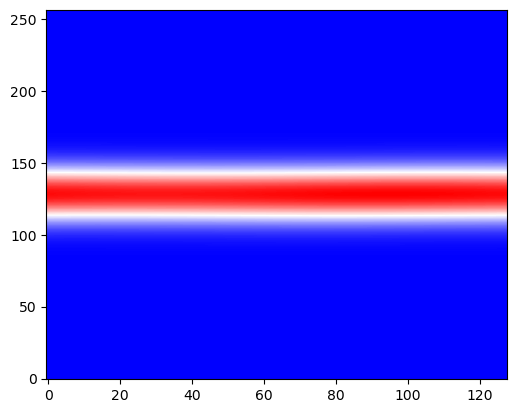

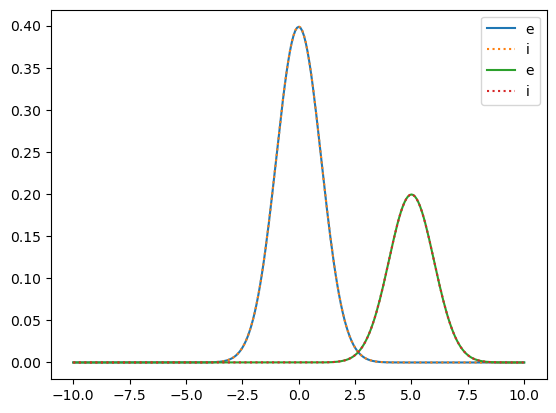

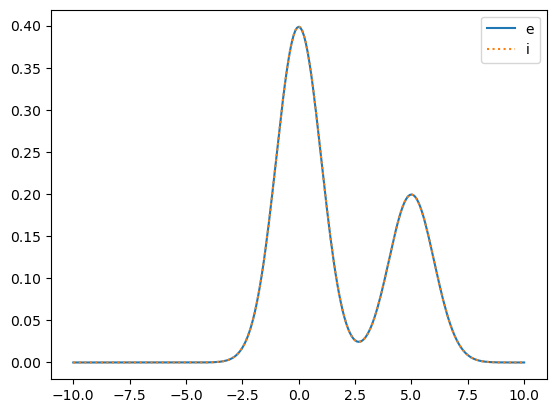

In [3]:
data_1 = np.loadtxt(file_f1)
data_2 = np.loadtxt(file_f2)
data_3 = np.loadtxt(file_f3)
data_4 = np.loadtxt(file_f4)

## F90 output
##  t,x(j),v(i),fs(ispec,j,i),fs0(ispec,j,i),fsb(ispec,j,i),fsw(ispec,j,i),fsc(ispec,j,i)




t = np.unique(data_1[:,0])
x = np.unique(data_1[:,1])
v = np.unique(data_1[:,2])

# extract dimentions from the data file
nt = len(t)
nx = len(x)
nv = len(v)

print(f"nt:{nt}")
print(f"nv:{nx}")
print(f"nv:{nv}")

f_1 = np.reshape(data_1[:,3],[nv,nx,nt],order='F');
f_2 = np.reshape(data_2[:,3],[nv,nx,nt],order='F');
f_3 = np.reshape(data_3[:,3],[nv,nx,nt],order='F');
f_4 = np.reshape(data_4[:,3],[nv,nx,nt],order='F');

x = 0
t = 1


plt.figure()
plt.imshow(f_1[:,:,t],origin='lower',cmap='bwr',aspect=0.4)


# look at cut

plt.figure()
plt.plot(v,f_1[:,x,0],'-',label='e',markevery=.05)
plt.plot(v,f_2[:,x,0],':',label='i',markevery=.05)
plt.plot(v,f_3[:,x,0],'-',label='e',markevery=.05)
plt.plot(v,f_4[:,x,0],':',label='i',markevery=.05)

plt.legend()

plt.figure()
plt.plot(v,f_1[:,x,0]+f_3[:,x,0],'-',label='e',markevery=.05)
plt.plot(v,f_2[:,x,0]+f_4[:,x,0],':',label='i',markevery=.05)



plt.legend()



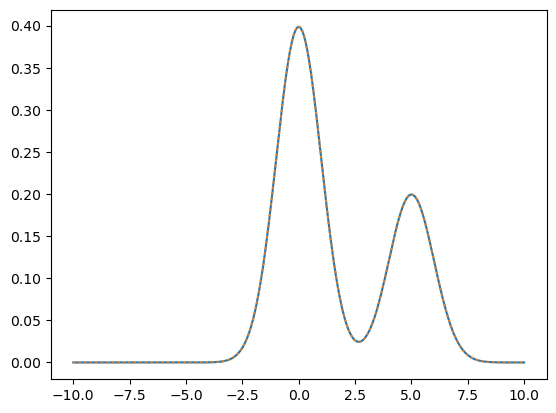

In [4]:


plt.figure()
plt.plot(v,f_1[:,x,0]+f_3[:,x,0],'-',label='e',markevery=.05)
plt.plot(v,f_2[:,x,0]+f_4[:,x,0],':',label='i',markevery=.05)

## $n(x)$ using f

(128, 11)


Text(0.5, 1.0, 'n(x)')

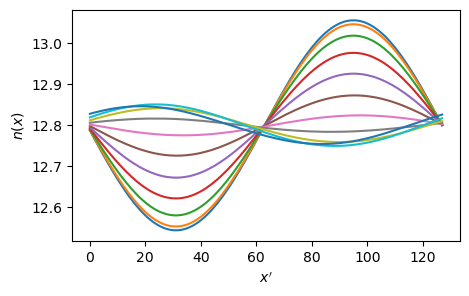

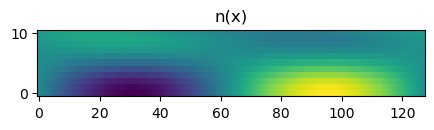

In [5]:
nr_data = np.sum(f_1,axis=0)
nr_data_2 = np.sum(f_2,axis=0)

print(np.shape(nr_data))


plt.figure(figsize=(5,3))

plt.plot(nr_data)


#plt.plot(nr_data_2,':')
plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$n(x)$')

plt.figure(figsize=(5,3))
plt.imshow(np.transpose(nr_data),aspect=2,origin='lower')
#plt.imshow(np.transpose(nr_data_2),':',aspect=2,origin='lower')

plt.title(r'n(x)')

## data $\phi$

In [6]:
data_phi = np.loadtxt(file_phi)

print(np.shape(data_phi))

(1408, 5)


phi shape:(128, 11)


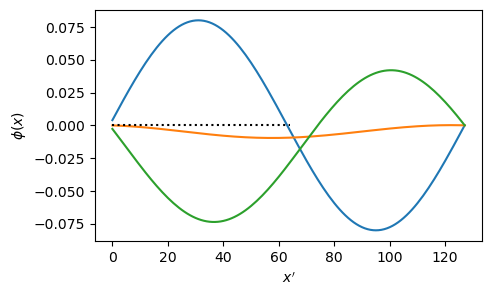

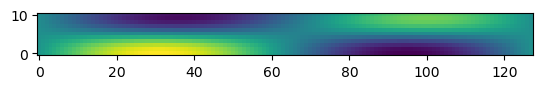

In [7]:
# plt.plot(data_phi[:,0])
# plt.plot(data_phi[:,1])
# plt.xlim([0,2**7-1])

## Phi file data format
## t,x(j),phi(j),rho(j),dphidx(j)

nt_phi = int(len(data_phi)/nx)
phi = np.reshape(data_phi[:,2],[nx,nt_phi],order='F')
rho = np.reshape(data_phi[:,3],[nx,nt_phi],order='F')


plt.figure(figsize=(5,3))
print(f"phi shape:{np.shape(phi)}")

# for i in range(0,10,2):
for i in range(0,np.shape(phi)[1],5):
    plt.plot(phi[:,i],label=str(i))

    
plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$\phi(x)$')

plt.plot([0,64],[0,0],'k:')
# plt.legend()

plt.figure()
plt.imshow(np.transpose(phi),origin='lower')

In [8]:
print(np.shape(data_phi))
print(nx*nt_phi)

(1408, 5)
1408


In [9]:
file_n = './landaudamp{}/landaudamp{}.vp_number'.format(run_id,run_id)

data_n1 = np.loadtxt(file_n)

print(np.shape(data_n1))

## F90 format
## write(num_unit,num_fmt) &
## jt,t,ns(1:nspec),ns0(1:nspec),nsb(1:nspec),nsw(1:nspec),nsc(1:nspec)

(1001, 22)


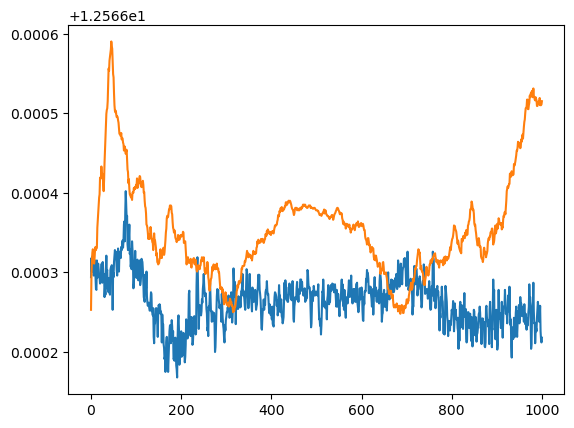

In [10]:
plt.plot(data_n1[:,2])
plt.plot(data_n1[:,3])